In [11]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [12]:

# Let's optimize this simple function:
# f(x) = -x² + 10
# Maximum at x = 0


In [13]:
# Objective function to maximize
def objective(x):
    return -x**2 + 10  # Max at x = 0

# Create random individual
def create_individual():
    return random.uniform(-10, 10)

# Hypermutation: mutate based on affinity (lower fitness -> more mutation)
def hypermutate(individual, fitness, max_fitness):
    mutation_rate = 1 - (fitness / (max_fitness + 1e-9))
    mutated = individual + random.uniform(-1, 1) * mutation_rate
    return np.clip(mutated, -10, 10)

In [14]:

# Simulating client requests
def simulate_requests(num_requests=10, num_servers=3, algorithm="round_robin"):
    servers = [Server(i) for i in range(1, num_servers + 1)]
    lb = LoadBalancer(servers, algorithm)

    for current_time in range(num_requests):
        lb.distribute_request(current_time)

    print("\nFinal Server States:")
    for server in servers:
        print(server)

        lb.print_summary()

In [15]:
# Clonal Selection Algorithm
def clonal_selection(pop_size=10, generations=30, clone_factor=3, replacement_rate=0.2):
    population = [create_individual() for _ in range(pop_size)]

    best_fitness_history = []

    for gen in range(generations):
        fitnesses = [objective(ind) for ind in population]
        best_fitness = max(fitnesses)
        best_individual = population[np.argmax(fitnesses)]
        best_fitness_history.append(best_fitness)

        # Select top individuals for cloning
        sorted_pop = [x for _, x in sorted(zip(fitnesses, population), reverse=True)]
        num_selected = pop_size // 2
        selected = sorted_pop[:num_selected]

        # Cloning and hypermutation
        clones = []
        for ind in selected:
            fit = objective(ind)
            for _ in range(clone_factor):
                mutated = hypermutate(ind, fit, best_fitness)
                clones.append(mutated)

        # Evaluate clones
        clone_fitnesses = [objective(cl) for cl in clones]
        sorted_clones = [x for _, x in sorted(zip(clone_fitnesses, clones), reverse=True)]
        population = sorted_pop[:pop_size - int(pop_size * replacement_rate)] + sorted_clones[:int(pop_size * replacement_rate)]

    print("Best solution:", best_individual)
    print("Best fitness:", best_fitness)

    # Plot fitness over generations
    plt.plot(best_fitness_history)
    plt.title("Best Fitness Over Generations")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.grid(True)
    plt.show()

Best solution: -2.005349869435263
Best fitness: 5.978571901155973


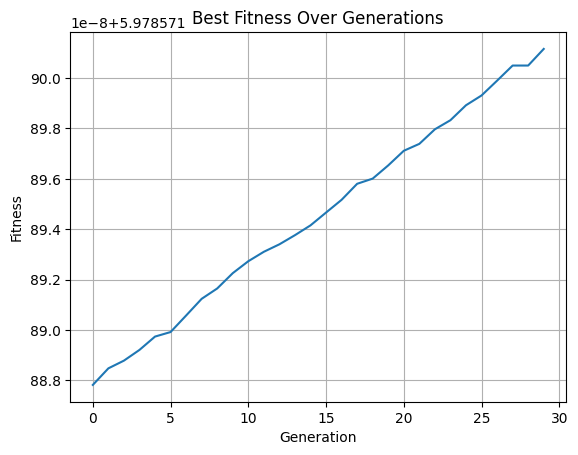

In [16]:

clonal_selection()